# Convolutional Neural Network Architecture

In [19]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

#loading the save numpy arrays in the previous code

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten,Dropout
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint

In [21]:
model=Sequential()

In [22]:
model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))


#The first CNN layer followed by Relu and MaxPooling layers


In [23]:
model.add(Activation('relu'))

In [24]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [25]:
model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [26]:
model.add(Flatten())
model.add(Dropout(0.5))

In [27]:
model.add(Dense(50,activation='relu')) #here 50 neurons in hidden layer 
model.add(Dense(2,activation='softmax'))

In [28]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 98, 98, 200)       2000      
_________________________________________________________________
activation_2 (Activation)    (None, 98, 98, 200)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 49, 49, 200)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 47, 47, 100)       180100    
_________________________________________________________________
activation_3 (Activation)    (None, 47, 47, 100)       0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 23, 23, 100)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 52900)            

In [29]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

In [30]:

history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
31/31 [==============================] - 46s 1s/step - loss: 1.2183 - accuracy: 0.5136 - val_loss: 0.6925 - val_accuracy: 0.5565
INFO:tensorflow:Assets written to: model-001.model\assets
Epoch 2/20
31/31 [==============================] - 46s 2s/step - loss: 0.6910 - accuracy: 0.5470 - val_loss: 0.6586 - val_accuracy: 0.5565
INFO:tensorflow:Assets written to: model-002.model\assets
Epoch 3/20
31/31 [==============================] - 43s 1s/step - loss: 0.5906 - accuracy: 0.6715 - val_loss: 0.5016 - val_accuracy: 0.7903
INFO:tensorflow:Assets written to: model-003.model\assets
Epoch 4/20
31/31 [==============================] - 42s 1s/step - loss: 0.4059 - accuracy: 0.8259 - val_loss: 0.3525 - val_accuracy: 0.8589
INFO:tensorflow:Assets written to: model-004.model\assets
Epoch 5/20
31/31 [==============================] - 44s 1s/step - loss: 0.2741 - accuracy: 0.8993 - val_loss: 0.3615 - val_accuracy: 0.8589
Epoch 6/20
31/31 [==============================] - 43s 1s/step - lo

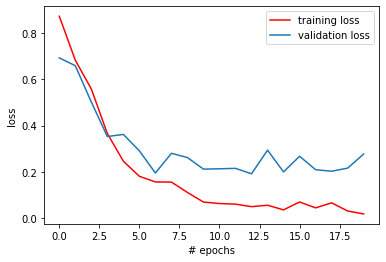

In [31]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

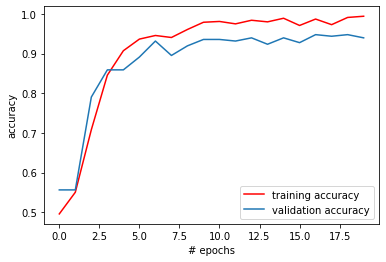

In [32]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [33]:
print(model.evaluate(test_data,test_target))

5/5 [==============================] - 2s 299ms/step - loss: 0.1080 - accuracy: 0.9783
[0.1080319881439209, 0.97826087474823]
